In [5]:
import pandas as pd

df = pd.read_csv("tashu_station_list.csv")
print(df.shape)
df.head()

(1135, 8)


,id,name,name_en,name_cn,x_pos,y_pos,address,parking_count
0,ST0002,티머니 임시대여소,시즌2 임시대여소,시즌2 임시대여소,37.554250,126.974017,서울특별시 중구 남대문로5가 581 서울시티타워,1
1,ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1
2,ST0004,한가람아파트(2동),한가람아파트(2동),한가람아파트(2동),36.348201,127.390409,탄방동 1446,0
3,ST0005,목련아파트(103동),목련아파트(103동),목련아파트(103동),36.350037,127.390402,둔산동 1510,1
4,ST0006,크로바아파트(103동),크로바아파트(103동),크로바아파트(103동),36.352480,127.390385,둔산동 1506,0


In [11]:
center_lat = df["x_pos"].mean()
center_lng = df["y_pos"].mean()
center_lat, center_lng

(36.350292977973574, 127.38790854625553)

In [17]:
import folium

folium_map = folium.Map(
    location=[center_lat, center_lng],
    zoom_start=13,
)

mask = df["parking_count"] > 0

for _, row in df[mask].iterrows():
    name = row["name"]
    lat = row["x_pos"]
    lng = row["y_pos"]
    parking_count = row["parking_count"]

    marker = folium.Marker(
        location=[lat, lng],
        tooltip=f"{name} - {parking_count}",
    )
    marker.add_to(folium_map)

folium_map

In [18]:
import folium
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
from IPython.display import display, Markdown

In [20]:
행정구역_gdf = gpd.read_file(
    "data/shp/읍면동/202302/emd.shp",
    encoding="euc-kr"
)
print(행정구역_gdf.shape)
행정구역_gdf.head()

(5065, 4)


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [21]:
행정구역_gdf.columns

Index(['EMD_CD', 'EMD_ENG_NM', 'EMD_KOR_NM', 'geometry'], dtype='object')

In [24]:
column_names = ["EMD_CD", "EMD_KOR_NM", "geometry"]
행정구역_gdf = 행정구역_gdf[column_names].rename(
    columns={
        "EMD_CD": "행정구역_코드",
        "EMD_KOR_NM": "행정구역_명",
    }
)
print(행정구역_gdf.shape)
행정구역_gdf.head()

(5065, 3)


,행정구역_코드,행정구역_명,geometry
0,11110101,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [25]:
행정구역_gdf.crs = 5179  # 현재 좌표계가 Korea 2000 좌표계임을 표시
행정구역_gdf = 행정구역_gdf.to_crs(epsg=4326)
print(행정구역_gdf.shape)
행정구역_gdf.head()

(5065, 3)


,행정구역_코드,행정구역_명,geometry
0,11110101,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,11110103,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,11110104,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,11110105,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."


<Axes: >

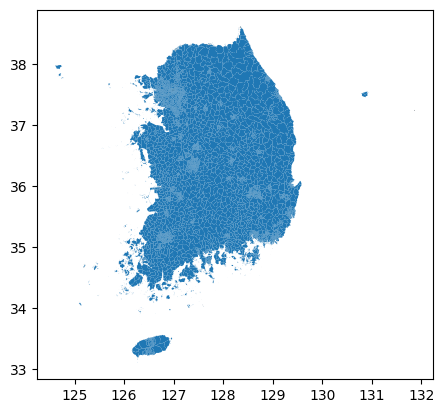

In [27]:
행정구역_gdf["geometry"].plot()

In [31]:
print(행정구역_gdf["geometry"][0].centroid)

POINT (126.96932393006509 37.58920547690369)


In [34]:
행정구역_gdf["행정구역_중심좌표"] = gpd.GeoSeries([g.centroid for g in 행정구역_gdf["geometry"]])
print(행정구역_gdf.shape)
행정구역_gdf.head()

(5065, 4)


,행정구역_코드,행정구역_명,geometry,행정구역_중심좌표
0,11110101,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589...",POINT (126.96932 37.58921)
1,11110102,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584...",POINT (126.96794 37.58451)
2,11110103,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586...",POINT (126.97271 37.58470)
3,11110104,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582...",POINT (126.97195 37.58267)
4,11110105,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581...",POINT (126.97247 37.58056)


## 타슈 대여소 위치 CSV 로딩

In [37]:
대여소_df = pd.read_csv("tashu_station_list.csv")
print(대여소_df.shape)
대여소_df.head()

(1135, 8)


,id,name,name_en,name_cn,x_pos,y_pos,address,parking_count
0,ST0002,티머니 임시대여소,시즌2 임시대여소,시즌2 임시대여소,37.554250,126.974017,서울특별시 중구 남대문로5가 581 서울시티타워,1
1,ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1
2,ST0004,한가람아파트(2동),한가람아파트(2동),한가람아파트(2동),36.348201,127.390409,탄방동 1446,0
3,ST0005,목련아파트(103동),목련아파트(103동),목련아파트(103동),36.350037,127.390402,둔산동 1510,1
4,ST0006,크로바아파트(103동),크로바아파트(103동),크로바아파트(103동),36.352480,127.390385,둔산동 1506,0


In [38]:
대여소_df = 대여소_df.rename(
    columns={
        "id": "대여소_식별자",
        "name": "대여소_명",
        "x_pos": "대여소_위도",
        "y_pos": "대여소_경도",
        "address": "대여소_주소",
        "parking_count": "대여소_주차수",
    },
)

print(대여소_df.shape)
대여소_df.head()

(1135, 8)


,대여소_식별자,대여소_명,name_en,name_cn,대여소_위도,대여소_경도,대여소_주소,대여소_주차수
0,ST0002,티머니 임시대여소,시즌2 임시대여소,시즌2 임시대여소,37.554250,126.974017,서울특별시 중구 남대문로5가 581 서울시티타워,1
1,ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1
2,ST0004,한가람아파트(2동),한가람아파트(2동),한가람아파트(2동),36.348201,127.390409,탄방동 1446,0
3,ST0005,목련아파트(103동),목련아파트(103동),목련아파트(103동),36.350037,127.390402,둔산동 1510,1
4,ST0006,크로바아파트(103동),크로바아파트(103동),크로바아파트(103동),36.352480,127.390385,둔산동 1506,0


(1135,)
0    POINT (126.97402 37.55425)
1    POINT (127.39005 36.34845)
2    POINT (127.39041 36.34820)
3    POINT (127.39040 36.35004)
4    POINT (127.39038 36.35248)
dtype: geometry


<Axes: >

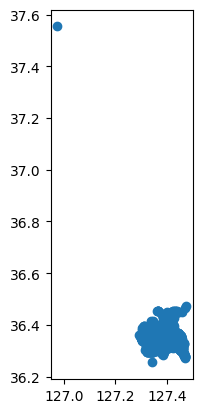

In [44]:
geometry = gpd.GeoSeries([
    Point(lng, lat)
    for lng, lat in zip(대여소_df["대여소_경도"], 대여소_df["대여소_위도"])
])
print(geometry.shape)
print(geometry.head())
geometry.plot()

In [45]:
대여소_gdf = gpd.GeoDataFrame(
    대여소_df,
    geometry=geometry,
)
대여소_gdf.crs = 4326  # WGS84 좌표계
print(대여소_gdf.shape)
대여소_gdf.head()

(1135, 9)


,대여소_식별자,대여소_명,name_en,name_cn,대여소_위도,대여소_경도,대여소_주소,대여소_주차수,geometry
0,ST0002,티머니 임시대여소,시즌2 임시대여소,시즌2 임시대여소,37.554250,126.974017,서울특별시 중구 남대문로5가 581 서울시티타워,1,POINT (126.97402 37.55425)
1,ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1,POINT (127.39005 36.34845)
2,ST0004,한가람아파트(2동),한가람아파트(2동),한가람아파트(2동),36.348201,127.390409,탄방동 1446,0,POINT (127.39041 36.34820)
3,ST0005,목련아파트(103동),목련아파트(103동),목련아파트(103동),36.350037,127.390402,둔산동 1510,1,POINT (127.39040 36.35004)
4,ST0006,크로바아파트(103동),크로바아파트(103동),크로바아파트(103동),36.352480,127.390385,둔산동 1506,0,POINT (127.39038 36.35248)


In [49]:
mask = 대여소_gdf["대여소_경도"] <= 127.2
mask.value_counts()

대여소_경도
False    1134
True        1
Name: count, dtype: int64

In [51]:
대여소_gdf = 대여소_gdf[~mask]  # mask를 반대로 적용
print(대여소_gdf.shape)
대여소_gdf.head()

(1134, 9)


,대여소_식별자,대여소_명,name_en,name_cn,대여소_위도,대여소_경도,대여소_주소,대여소_주차수,geometry
1,ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1,POINT (127.39005 36.34845)
2,ST0004,한가람아파트(2동),한가람아파트(2동),한가람아파트(2동),36.348201,127.390409,탄방동 1446,0,POINT (127.39041 36.34820)
3,ST0005,목련아파트(103동),목련아파트(103동),목련아파트(103동),36.350037,127.390402,둔산동 1510,1,POINT (127.39040 36.35004)
4,ST0006,크로바아파트(103동),크로바아파트(103동),크로바아파트(103동),36.352480,127.390385,둔산동 1506,0,POINT (127.39038 36.35248)
5,ST0007,한마루아파트(107동),한마루아파트(107동),한마루아파트(107동),36.354587,127.390468,둔산동 1388,1,POINT (127.39047 36.35459)


In [52]:
대여소_gdf.head(1)

,대여소_식별자,대여소_명,name_en,name_cn,대여소_위도,대여소_경도,대여소_주소,대여소_주차수,geometry
1,ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1,POINT (127.39005 36.34845)


In [53]:
행정구역_gdf.head(1)

,행정구역_코드,행정구역_명,geometry,행정구역_중심좌표
0,11110101,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589...",POINT (126.96932 37.58921)


In [57]:
합산_gdf = gpd.sjoin(
    대여소_gdf,
    행정구역_gdf,
    how='left',
    op='within'
).set_index("대여소_식별자")


display(Markdown("## sjoin된 원본"))
display(합산_gdf.head(1))

display(Markdown("## 사용할 컬럼만 추출"))
합산_gdf = 합산_gdf[
    [
        "행정구역_코드",
        "행정구역_명",
        "대여소_주차수",
        "행정구역_중심좌표",
    ]
]

print(합산_gdf.shape)
합산_gdf.head()

/Users/allieus/Work/offline-abc-bootcamp-2023/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


## sjoin된 원본

,대여소_명,name_en,name_cn,대여소_위도,대여소_경도,대여소_주소,대여소_주차수,geometry,index_right,행정구역_코드,행정구역_명,행정구역_중심좌표
대여소_식별자,,,,,,,,,,,,
ST0003,탄방동 한사랑병원,탄방동 한사랑병원,탄방동 한사랑병원,36.348446,127.390052,탄방동 730,1,POINT (127.39005 36.34845),1297,30170106,탄방동,POINT (127.39162 36.34502)


## 사용할 컬럼만 추출

(1134, 4)


,행정구역_코드,행정구역_명,대여소_주차수,행정구역_중심좌표
대여소_식별자,,,,
ST0003,30170106,탄방동,1,POINT (127.39162 36.34502)
ST0004,30170106,탄방동,0,POINT (127.39162 36.34502)
ST0005,30170112,둔산동,1,POINT (127.38902 36.35580)
ST0006,30170112,둔산동,0,POINT (127.38902 36.35580)
ST0007,30170112,둔산동,1,POINT (127.38902 36.35580)


In [58]:
print(합산_gdf.groupby("행정구역_코드")["행정구역_명"].count())
print(합산_gdf.groupby("행정구역_코드")["대여소_주차수"].sum())

행정구역_코드
30110101     5
30110102     7
30110103     4
30110104     6
30110105    23
            ..
30230116     3
30230117     1
30230124     1
30230125     2
30230126    12
Name: 행정구역_명, Length: 113, dtype: int64
행정구역_코드
30110101    0
30110102    2
30110103    3
30110104    5
30110105    7
           ..
30230116    1
30230117    0
30230124    0
30230125    0
30230126    2
Name: 대여소_주차수, Length: 113, dtype: int64


In [59]:
통계_df = 합산_gdf.groupby('행정구역_코드').agg(
    count=("행정구역_명", "count"),
    sum=("대여소_주차수", "sum"),
)
통계_df.columns = ["행정구역내_대여소_수", "행정구역내_주차수"]

print(통계_df.shape)
통계_df.head()

(113, 2)


,행정구역내_대여소_수,행정구역내_주차수
행정구역_코드,,
30110101,5,0
30110102,7,2
30110103,4,3
30110104,6,5
30110105,23,7


In [61]:
합산_gdf.head()

,행정구역_코드,행정구역_명,대여소_주차수,행정구역_중심좌표
대여소_식별자,,,,
ST0003,30170106,탄방동,1,POINT (127.39162 36.34502)
ST0004,30170106,탄방동,0,POINT (127.39162 36.34502)
ST0005,30170112,둔산동,1,POINT (127.38902 36.35580)
ST0006,30170112,둔산동,0,POINT (127.38902 36.35580)
ST0007,30170112,둔산동,1,POINT (127.38902 36.35580)


In [60]:
print("before :", 합산_gdf.shape)

names_df = 합산_gdf[["행정구역_코드", "행정구역_명", "행정구역_중심좌표"]]\
    .set_index("행정구역_코드")\
    .drop_duplicates()

print("after :", names_df.shape)
names_df.head()

before : (1134, 4)
after : (113, 2)


,행정구역_명,행정구역_중심좌표
행정구역_코드,,
30170106,탄방동,POINT (127.39162 36.34502)
30170112,둔산동,POINT (127.38902 36.35580)
30170113,월평동,POINT (127.36177 36.35018)
30170128,만년동,POINT (127.38281 36.36792)
30200111,봉명동,POINT (127.34607 36.35359)


In [65]:
통계_df.head()

,행정구역내_대여소_수,행정구역내_주차수
행정구역_코드,,
30110101,5,0
30110102,7,2
30110103,4,3
30110104,6,5
30110105,23,7


In [67]:
names_df.head()

,행정구역_명,행정구역_중심좌표
행정구역_코드,,
30170106,탄방동,POINT (127.39162 36.34502)
30170112,둔산동,POINT (127.38902 36.35580)
30170113,월평동,POINT (127.36177 36.35018)
30170128,만년동,POINT (127.38281 36.36792)
30200111,봉명동,POINT (127.34607 36.35359)


In [68]:
gdf = gpd.GeoDataFrame(
    pd.concat([통계_df, names_df], axis=1)
)
print(gdf.shape)
gdf.head()

(113, 4)


,행정구역내_대여소_수,행정구역내_주차수,행정구역_명,행정구역_중심좌표
행정구역_코드,,,,
30110101,5,0,원동,POINT (127.43418 36.32738)
30110102,7,2,인동,POINT (127.43838 36.32211)
30110103,4,3,효동,POINT (127.44064 36.31667)
30110104,6,5,천동,POINT (127.44627 36.31437)
30110105,23,7,가오동,POINT (127.45843 36.30765)


In [69]:
지도_중심좌표 = MultiPoint(gdf["행정구역_중심좌표"]).centroid

print(지도_중심좌표)
print("위도:", 지도_중심좌표.y)
print("경도:", 지도_중심좌표.x)

POINT (127.39280190392967 36.35505046682351)
위도: 36.35505046682351
경도: 127.39280190392967


In [70]:
steps = gdf["행정구역내_주차수"].max() - gdf["행정구역내_주차수"].min() + 1
print("주차수 범위 :", steps)
colors_map = sns.color_palette("coolwarm", n_colors=steps).as_hex()  # 총 steps개 컬러
len(colors_map)

주차수 범위 : 61


NameError: name 'sns' is not defined

In [71]:
import seaborn as sns

In [72]:
steps = gdf["행정구역내_주차수"].max() - gdf["행정구역내_주차수"].min() + 1
print("주차수 범위 :", steps)
colors_map = sns.color_palette("coolwarm", n_colors=steps).as_hex()  # 총 steps개 컬러
len(colors_map)

주차수 범위 : 61


61

In [73]:
colors_map

['#3f53c6',
 '#445acc',
 '#4961d2',
 '#4e68d8',
 '#536edd',
 '#5875e1',
 '#5d7ce6',
 '#6384eb',
 '#688aef',
 '#6e90f2',
 '#7396f5',
 '#799cf8',
 '#7ea1fa',
 '#84a7fc',
 '#89acfd',
 '#90b2fe',
 '#96b7ff',
 '#9bbcff',
 '#a1c0ff',
 '#a6c4fe',
 '#abc8fd',
 '#b1cbfc',
 '#b6cefa',
 '#bcd2f7',
 '#c1d4f4',
 '#c6d6f1',
 '#cbd8ee',
 '#cfdaea',
 '#d4dbe6',
 '#d8dce2',
 '#dddcdc',
 '#e1dad6',
 '#e5d8d1',
 '#e9d5cb',
 '#ecd3c5',
 '#efcfbf',
 '#f1ccb8',
 '#f3c8b2',
 '#f5c2aa',
 '#f6bea4',
 '#f7b99e',
 '#f7b497',
 '#f7af91',
 '#f7a98b',
 '#f6a385',
 '#f59d7e',
 '#f39577',
 '#f18f71',
 '#ef886b',
 '#ec8165',
 '#e97a5f',
 '#e67259',
 '#e36b54',
 '#df634e',
 '#d95847',
 '#d55042',
 '#d0473d',
 '#cb3e38',
 '#c53334',
 '#c0282f',
 '#ba162b']

In [74]:
folium_map = folium.Map(
    location=[지도_중심좌표.y, 지도_중심좌표.x],
    zoom_start=12,
)

for (행정구역_코드, row) in gdf.iterrows():
    longitude, latitude = row["행정구역_중심좌표"].x, row["행정구역_중심좌표"].y
    popup = f'''<div style="min-width: 200px;">
        {row["행정구역_명"]}: 대여소({row["행정구역내_대여소_수"]}), 주차수({row["행정구역내_주차수"]})
    </div>'''

    bg_color = colors_map[row["행정구역내_주차수"]]

    radius = 30

    # icon = folium.Icon(color='blue', icon='info-sign')
    icon = folium.DivIcon(
        html=f"""
            <div style="
                background-color: {bg_color};
                border-radius: 50%;
                width: {radius}px;
                height: {radius}px;
                text-align: center;
                display: flex; /* Use Flexbox */
                justify-content: center; /* Center horizontally */
                align-items: center; /* Center vertically */
                line-height: {radius/3}px;
                color: white;">{row["행정구역_명"]}<br/>{row["행정구역내_주차수"]}</div>
        """
    )
    marker = folium.Marker(
        [latitude, longitude],
        popup=popup,
        icon=icon,
    )
    marker.add_to(folium_map)

folium_map